In [1]:
#!pip3 install scanpy

In [3]:
import re
import pandas as pd
import scanpy as sc
import os
import numpy as np
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.5 scipy==1.8.1 pandas==1.4.3 scikit-learn==1.2.0 statsmodels==0.13.5 pynndescent==0.5.8


# Read observation data

In [4]:
os.getcwd()
os.chdir('data')

### Get observation data

In [5]:
print('reading observation data...')
df_obs = sc.read_h5ad('./sc_training.h5ad')
df_obs = df_obs.obs
df_obs

reading observation data...


,gRNA_maxID,state,condition,lane
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1
053l1_AAACCTGAGTCGTTTG-1,Tox2-3,terminal exhausted,Tox2,lane1
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1
...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,Tox2-3,other,Tox2,lane4
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4
053l4_TTTGTCATCCTCGCAT-1,Zeb2-2,cycling,Zeb2,lane4
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4


### Unperturbed data

In [6]:
unperturbed_data = df_obs[df_obs['condition'] == 'Unperturbed']
unperturbed_data = unperturbed_data[['gRNA_maxID','state']]
unperturbed_data = unperturbed_data.groupby(by=['gRNA_maxID'],as_index=False).value_counts(normalize=True)

unperturbed_data

,gRNA_maxID,state,proportion
0,Arid4b-1,cycling,NaN
1,Arid4b-1,effector,NaN
2,Arid4b-1,other,NaN
3,Arid4b-1,progenitor,NaN
4,Arid4b-1,terminal exhausted,NaN
...,...,...,...
1075,Zfp292-3,cycling,NaN
1076,Zfp292-3,effector,NaN
1077,Zfp292-3,other,NaN
1078,Zfp292-3,progenitor,NaN


### Get cells data

In [7]:
print('reading cells adata.X.toarray()...')
adata_df = sc.read_h5ad('./sc_training.h5ad')
adata = pd.DataFrame(adata_df.X.toarray())
adata.columns = adata_df.var_names
adata.index = adata_df.obs_names
adata

reading cells adata.X.toarray()...


,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,Pcmtd1,Gm26901,Rrs1,Adhfe1,...,Slc3a1,Cfap53,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot
053l1_AAACCTGAGATGTCGG-1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGCAACGGT-1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,0.000000,0.0,0.484165,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTACGACG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693748,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTCGTTTG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l1_AAACCTGAGTGAAGAG-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCATCAGGTTCA-1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCAGTGTTG-1,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCCTCGCAT-1,0.000000,0.000000,0.000000,0.515672,0.515672,0.000000,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
053l4_TTTGTCATCTTCAACT-1,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,0.000000,0.0,0.383328,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Get clone information file

In [8]:
clone_info = pd.read_csv('clone_information.csv')
clone_info.index = clone_info['Unnamed: 0']
clone_info = clone_info.drop(['Unnamed: 0','gRNA_maxID'],axis=1)
clone_info = clone_info.rename_axis('index')
clone_info

,gRNA_bam,umi
index,,
053l1_AAACCTGAGATGTCGG-1,CAACGGATCAATAGAGCCAT,TAGTCC
053l1_AAACCTGAGCAACGGT-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGAGTGTTAGA-1,CGTAGGCGATATAATTCTAG,GGAATG
...,...,...
053l4_TTTGTCAGTGCCTGCA-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,CCACGCATGGAGAGGGTGAG,AAGAGG


### Merge all the data

In [9]:
print('merging observation data with cells data on the same index...')
df_partial_data = df_obs.merge(adata,left_index=True,right_index=True)
df_full_data = df_partial_data.merge(clone_info,left_index=True,right_index=True)

df_full_data

merging observation data with cells data on the same index...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGATGTCGG-1,ONE-NON-GENE-SITE-7,terminal exhausted,Unperturbed,lane1,0.511520,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CAACGGATCAATAGAGCCAT,TAGTCC
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGAGTGTTAGA-1,ONE-NON-GENE-SITE-6,effector,Unperturbed,lane1,0.000000,1.089103,0.686024,0.686024,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CGTAGGCGATATAATTCTAG,GGAATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Perturbed data

In [10]:
print('dropping unperturbed data...')
perturbed_data = df_full_data[df_full_data['condition'] != 'Unperturbed']
perturbed_data['condition'] = perturbed_data['condition'].cat.remove_categories('Unperturbed')

perturbed_data

dropping unperturbed data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


In [11]:
# print('grouping the data by gRNA_maxID and getting the proportions...')
# perturbed_data_prop = perturbed_data.iloc[:,0:4].groupby(by=['gRNA_maxID'],as_index=False).value_counts(normalize=True)
# perturbed_data_prop

In [12]:
# print('dropping perturbations with < 2...')
# perturbed_data_prop_filtered = perturbed_data_prop[perturbed_data_prop['proportion'] > 2]
# perturbed_data_prop_filtered = perturbed_data_prop_filtered.drop('proportion',axis=1).reset_index(drop=True)
# perturbed_data_prop_filtered

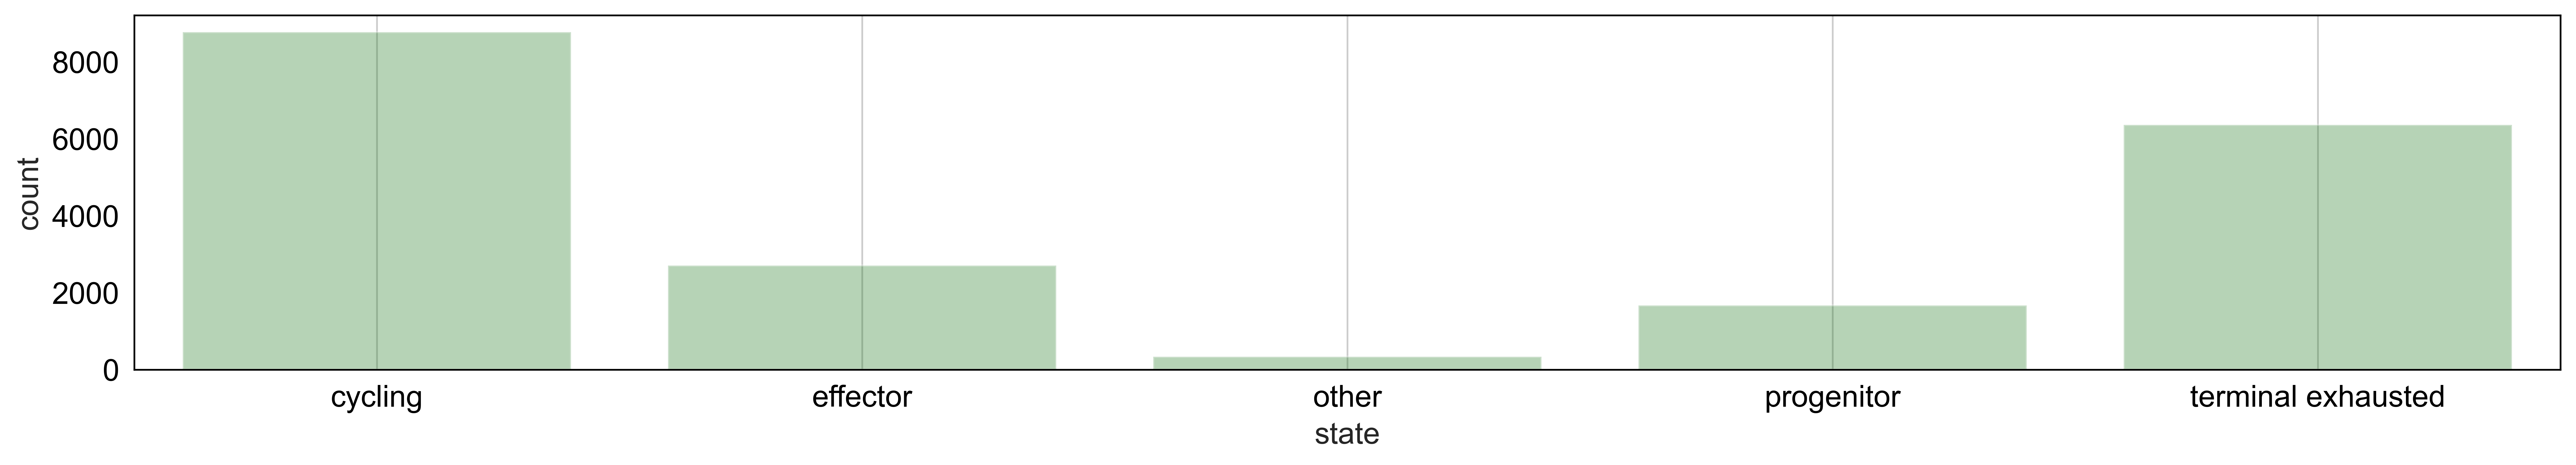

In [13]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.countplot(x=perturbed_data['state'],color='green',alpha=0.3)
plt.grid()

In [14]:
nans = pd.DataFrame(perturbed_data.isna().sum())
nans[nans[0] > 0]

,0
umi,123


In [15]:
perturbed_data['umi'] = perturbed_data['umi'].fillna('mean')
perturbed_data_final = perturbed_data

In [16]:
perturbed_data_final['umi']

053l1_AAACCTGAGCAACGGT-1    ACTTCG
053l1_AAACCTGAGTACGACG-1    ATGACG
053l1_AAACCTGAGTGAAGAG-1    ACAGTG
053l1_AAACCTGCAGCAGTTT-1    ACTTCG
053l1_AAACCTGCATTACCTT-1    CAATCG
                             ...  
053l4_TTTGTCAGTGCCTGCA-1    ACTTCG
053l4_TTTGTCAGTTTCCACC-1    ACTTCG
053l4_TTTGTCATCAGTGTTG-1    AAGAGG
053l4_TTTGTCATCTTCAACT-1    CTGAGA
053l4_TTTGTCATCTTTCCTC-1    AAGAGG
Name: umi, Length: 19855, dtype: object

# Split the data into Train & validate

In [17]:
print('splitting the data into train,validate, & test sets...')
train_data = perturbed_data_final.drop(['Aqr','Bach2','Bhlhe40','Ets1','Fosb','Mafk','Stat3'],axis=1)
validate_data = perturbed_data_final.iloc[:,0:4]
validate_data['gRNA_bam'] = perturbed_data_final['gRNA_bam']
validate_data['umi'] = perturbed_data_final['umi']
validate_data = pd.concat([validate_data,perturbed_data_final[['Aqr','Bach2','Bhlhe40']]],axis=1)

splitting the data into train,validate, & test sets...


In [18]:
validate_data

,gRNA_maxID,state,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,TCCGGACCTTCAGCGGAAGC,ATGACG,0.000000,0.0,2.080492
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,CCGATCTCTCTGGATTTTAT,ACAGTG,0.617566,0.0,0.996512
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,GAGTCATATGCCGCCACCTC,ACTTCG,0.192784,0.0,1.069386
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,CACACGTCGCAGTTCATCTT,CAATCG,0.000000,0.0,1.267602
...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,1.889790
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,GAGTCATATGCCGCCACCTC,ACTTCG,0.000000,0.0,0.880552
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,CCACGCATGGAGAGGGTGAG,AAGAGG,0.000000,0.0,1.011989
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,CCGGGACCAGCTTAGCGTGG,CTGAGA,0.000000,0.0,1.735469


### Encoding categorical columns

In [19]:
from sklearn.preprocessing import LabelEncoder

def encode_data(df_train,df_validate):

    encoder_A = LabelEncoder()
    encoder_B = LabelEncoder()
    encoder_C = LabelEncoder()
    encoder_D = LabelEncoder()
    encoder_E = LabelEncoder()
    encoder_F = LabelEncoder()

    print('encoding train categorical variables...')
    df_train['gRNA_maxID'] = encoder_A.fit_transform(df_train['gRNA_maxID'])
    df_train['state'] = encoder_B.fit_transform(df_train['state'])
    df_train['condition'] = encoder_C.fit_transform(df_train['condition'])
    df_train['lane'] = encoder_D.fit_transform(df_train['lane'])
    df_train['gRNA_bam'] = encoder_E.fit_transform(df_train['gRNA_bam'])
    df_train['umi'] = encoder_F.fit_transform(df_train['umi'])

    print('encoding validate categorical variables...')
    df_validate['gRNA_maxID'] = encoder_A.transform(df_validate['gRNA_maxID'])
    df_validate['state'] = encoder_B.transform(df_validate['state'])
    df_validate['condition'] = encoder_C.transform(df_validate['condition'])
    df_validate['lane'] = encoder_D.transform(df_validate['lane'])
    df_validate['gRNA_bam'] = encoder_E.fit_transform(df_validate['gRNA_bam'])
    df_validate['umi'] = encoder_F.fit_transform(df_validate['umi'])

    return df_train,df_validate

train_data_labeled,validate_data_labeled = encode_data(train_data,validate_data)
train_data_labeled

encoding train categorical variables...
encoding validate categorical variables...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [20]:
validate_data_labeled

,gRNA_maxID,state,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,138,62,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,171,1,62,0,151,113,0.000000,0.0,2.080492
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,58,32,0.617566,0.0,0.996512
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,138,62,0.192784,0.0,1.069386
053l1_AAACCTGCATTACCTT-1,80,0,28,0,27,131,0.000000,0.0,1.267602
...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,138,62,0.000000,0.0,1.889790
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,138,62,0.000000,0.0,0.880552
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,48,12,0.000000,0.0,1.011989
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,64,232,0.000000,0.0,1.735469


### Normalize data

In [21]:
def normalize_data(df_train,df_validate):
    print('normalizing training data...')
    df_train_normalized = df_train.copy()
    df_train_normalized.iloc[:,4:-2] = (df_train_normalized.iloc[:,4:-2] / df_train_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_train_normalized.iloc[:,4:-2] = np.log1p(df_train_normalized.iloc[:,4:-2])

    print('normalizing validate data...')
    df_validate_normalized = df_validate.copy()
    df_validate_normalized.iloc[:,6:] = (df_validate_normalized.iloc[:,6:] / df_validate_normalized.iloc[:,6:].sum(axis=0)) * 10000
    df_validate_normalized.iloc[:,6:] = np.log1p(df_validate_normalized.iloc[:,6:])

    return df_train_normalized,df_validate_normalized

df_train_data_normalized,df_validate_data_normalized = normalize_data(train_data_labeled,validate_data_labeled)
df_train_data_normalized

normalizing training data...
normalizing validate data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [22]:
nans_train = df_train_data_normalized.isna().sum().reset_index()
nans_train = nans_train[nans_train[0] > 0]
nans_train

,index,0
519,Nav1,19855
5008,Wnt5b,19855
8690,Igfbp3,19855
13438,Slc25a2,19855
14677,Cnksr1,19855
14971,Btk,19855
14973,D030040B21Rik,19855
14987,Gm14435,19855
14988,Fabp4,19855
14994,Dcdc2b,19855


In [23]:
nans_validate = df_validate_data_normalized.isna().sum().reset_index()
nans_validate = nans_validate[nans_validate[0] > 0]
nans_validate

,index,0


In [24]:
df_train_data_normalized = df_train_data_normalized.drop(nans_train['index'],axis=1)
df_train_data_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Dimensionality reduction: applying PCA

In [25]:
from sklearn.decomposition import PCA
print('applying PCA of 50 components to the data...')
pca = PCA(n_components=1)

left_side = df_train_data_normalized.iloc[:,:4]
left_side['gRNA_bam'] = df_train_data_normalized['gRNA_bam']
left_side['umi'] = df_train_data_normalized['umi']
left_side = left_side.reset_index(drop=True)
right_side = df_train_data_normalized.iloc[:,4:-2]
right_side = right_side.reset_index(drop=True)

right_side_pca = pd.DataFrame(pca.fit_transform(right_side))
df_train_data_normalized_PCA = pd.concat([left_side,right_side_pca],axis=1)
df_train_data_normalized_PCA

applying PCA of 50 components to the data...


,gRNA_maxID,state,condition,lane,gRNA_bam,umi,0
0,169,1,61,0,138,62,-5.558000
1,171,1,62,0,151,113,-11.278374
2,162,1,59,0,58,32,-7.678621
3,169,0,61,0,138,62,10.773599
4,80,0,28,0,27,131,0.859901
...,...,...,...,...,...,...,...
19850,169,4,61,3,138,62,-4.567680
19851,169,4,61,3,138,62,-3.697927
19852,25,0,8,3,48,12,6.267431
19853,146,0,52,3,64,232,-0.207727


In [26]:
print(pca.explained_variance_ratio_)

[0.01885727]


# Split the data into X_train,X_valid,y

In [27]:
from sklearn.model_selection import train_test_split

print('splitting the data into X & y...')
X_train = df_train_data_normalized_PCA.drop('state',axis=1).reset_index(drop=True)
X_train.columns = X_train.columns.astype(str)
y = df_train_data_normalized_PCA['state'].reset_index(drop=True)
X_valid = df_validate_data_normalized.drop('state',axis=1)

X_train

splitting the data into X & y...


,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-5.558000
1,171,62,0,151,113,-11.278374
2,162,59,0,58,32,-7.678621
3,169,61,0,138,62,10.773599
4,80,28,0,27,131,0.859901
...,...,...,...,...,...,...
19850,169,61,3,138,62,-4.567680
19851,169,61,3,138,62,-3.697927
19852,25,8,3,48,12,6.267431
19853,146,52,3,64,232,-0.207727


In [28]:
X_valid

,gRNA_maxID,condition,lane,gRNA_bam,umi,Aqr,Bach2,Bhlhe40
053l1_AAACCTGAGCAACGGT-1,169,61,0,138,62,0.000000,0.0,0.000000
053l1_AAACCTGAGTACGACG-1,171,62,0,151,113,0.000000,0.0,0.653167
053l1_AAACCTGAGTGAAGAG-1,162,59,0,58,32,1.258162,0.0,0.365639
053l1_AAACCTGCAGCAGTTT-1,169,61,0,138,62,0.580166,0.0,0.387788
053l1_AAACCTGCATTACCTT-1,80,28,0,27,131,0.000000,0.0,0.445661
...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,61,3,138,62,0.000000,0.0,0.608210
053l4_TTTGTCAGTTTCCACC-1,169,61,3,138,62,0.000000,0.0,0.329352
053l4_TTTGTCATCAGTGTTG-1,25,8,3,48,12,0.000000,0.0,0.370384
053l4_TTTGTCATCTTCAACT-1,146,52,3,64,232,0.000000,0.0,0.570289


# Balance the target variable

In [29]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res,y_res = smote.fit_resample(X_train,y)

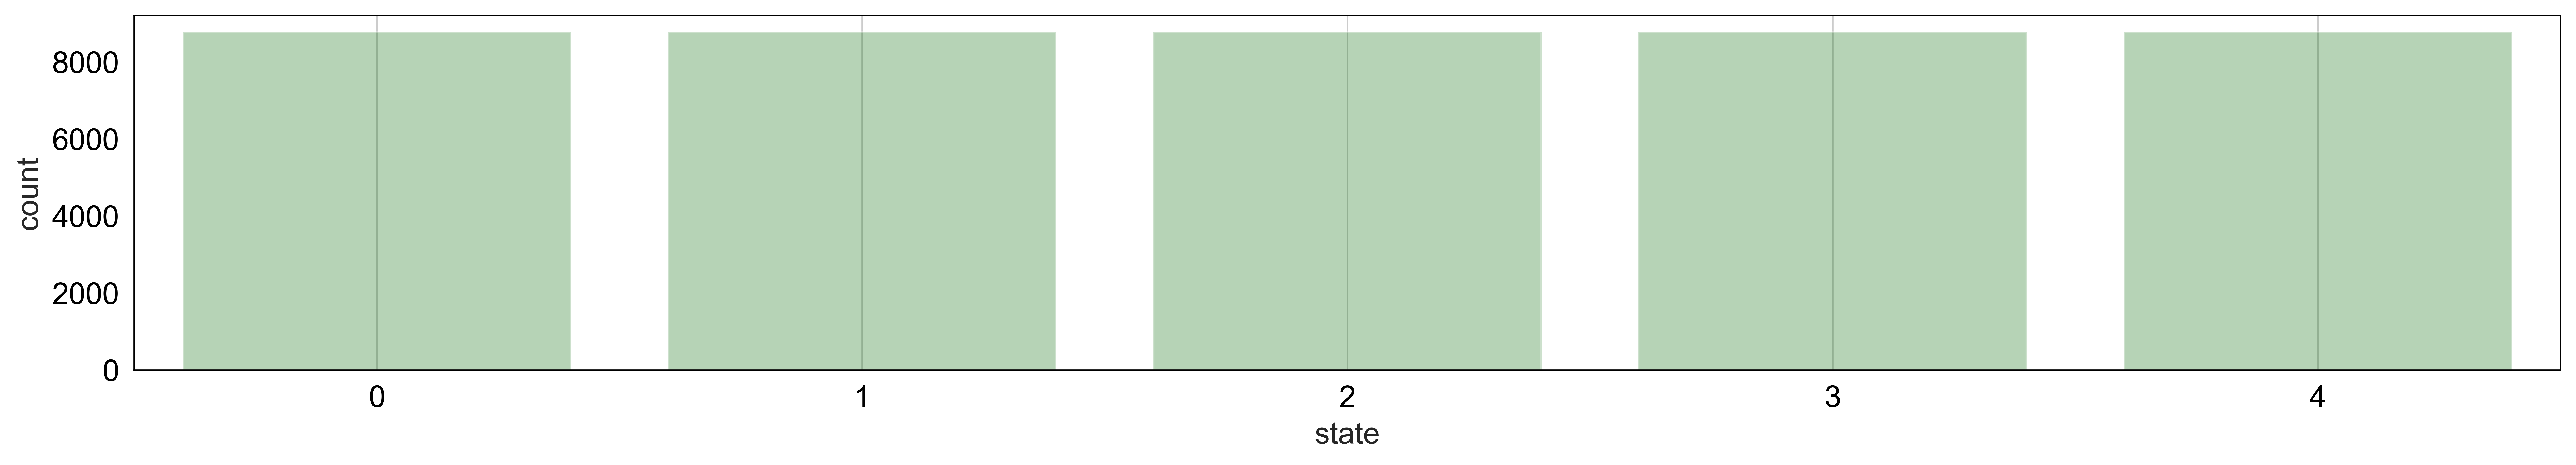

In [30]:
ax,fig = plt.subplots(figsize=(20,3),dpi=300)
ax = sns.countplot(x=y_res,color='green',alpha=0.3)
plt.grid()

### Use KMeans to determine the optimal number of clusters

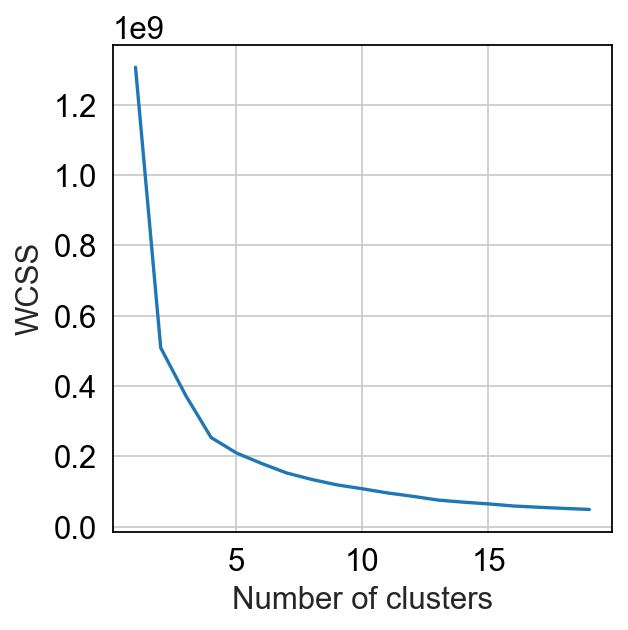

In [31]:
from sklearn.cluster import KMeans

k_values = range(1,20)
wcss = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_res)
    score = kmeans.inertia_
    wcss.append(score)

plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [32]:
# import umap
# import seaborn as sns
# import random
#
# k = 4
#
# reducer = umap.UMAP(min_dist=0.3,n_neighbors=k,verbose=2)
# reduced_data_train = reducer.fit_transform(X_train_res,y_res)
#
# labels = y_res
# labels = labels.replace({0:'cycling',1:'effector',3:'other',4:'progenitor',2:'terminal exhausted'})
#
# ax,fig = plt.subplots(figsize=(3.5,3.5),dpi=150)
# sns.scatterplot(x=reduced_data_train[:,0],y=reduced_data_train[:,1],hue=labels,palette='magma')
# plt.legend(loc='center left',bbox_to_anchor=(1,0.5),fontsize=6)
# plt.xticks(fontsize=6)
# plt.yticks(fontsize=6)
# plt.grid();

### Build a K-nearest neigbors model using euclidean distance to cluster the data

In [33]:
from sklearn.neighbors import KNeighborsClassifier
validate_vars = X_valid.iloc[:,5:].columns

def fit_knn_model(X_train,y,X_valid,vars):

    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        print(f'fitting a KNeighborsClassifier with 4 neighbors for {var}...')
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn_model = knn.fit(X_train,y)

        print(f'predicting the validation knockout variables clusters for {var}')
        X_valid_df = X_valid[['gRNA_maxID','condition','lane','gRNA_bam','umi',var]]
        X_valid_df.columns = ['gRNA_maxID','condition','lane','gRNA_bam','umi','0']
        y_pred_knn_validate = knn_model.predict(X_valid_df)
        print(f'adding the predicted clusters to the validation data for {var}')
        X_valid_df['cluster'] = y_pred_knn_validate

        X_valid_proportion = X_valid_df.groupby('cluster',as_index=False)['0'].sum()
        X_valid_proportion = X_valid_proportion['0']/X_valid_proportion['0'].sum()
        X_valid_proportion = pd.DataFrame(X_valid_proportion).T
        X_valid_proportion.columns = ['a_i','b_i','c_i','d_i','e_i']
        print(f'converting {var} to probabilities')
        final_data_frame = pd.concat([final_data_frame,X_valid_proportion],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = pd.DataFrame(round(final_data_frame,2))
    final_data_frame = final_data_frame.rename_axis('gene')
    return final_data_frame

validate_data_predicted = fit_knn_model(X_train_res,y_res,X_valid,validate_vars)
validate_data_predicted

fitting a KNeighborsClassifier with 4 neighbors for Aqr...
predicting the validation knockout variables clusters for Aqr
adding the predicted clusters to the validation data for Aqr
converting Aqr to probabilities
fitting a KNeighborsClassifier with 4 neighbors for Bach2...
predicting the validation knockout variables clusters for Bach2
adding the predicted clusters to the validation data for Bach2
converting Bach2 to probabilities
fitting a KNeighborsClassifier with 4 neighbors for Bhlhe40...
predicting the validation knockout variables clusters for Bhlhe40
adding the predicted clusters to the validation data for Bhlhe40
converting Bhlhe40 to probabilities


,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Aqr,0.35,0.02,0.09,0.09,0.45
Bach2,0.34,0.04,0.05,0.24,0.33
Bhlhe40,0.32,0.03,0.09,0.12,0.45


In [34]:
validate_data_predicted.to_csv('submission/solution/validation_output.csv',index=True)

### Get the ground truth

In [35]:
def get_ground_truth(df,vars):
    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        ground_truth = df.groupby('state',as_index=False)[var].sum()
        ground_truth = ground_truth[var]/ground_truth[var].sum()
        ground_truth = pd.DataFrame(ground_truth).T
        ground_truth.columns = ['a_i','b_i','c_i','d_i','e_i']
        final_data_frame = pd.concat([final_data_frame,ground_truth],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = round(final_data_frame,2)
    return final_data_frame

ground_truth = get_ground_truth(validate_data,validate_vars)
ground_truth

,a_i,b_i,c_i,d_i,e_i
Aqr,0.48,0.10,0.02,0.07,0.32
Bach2,0.29,0.25,0.02,0.27,0.17
Bhlhe40,0.43,0.15,0.01,0.10,0.31


### Compare the prediction to the ground truth

In [36]:
diff = validate_data_predicted - ground_truth
diff = diff.apply(lambda x: round(x * 100,2))
diff = diff.apply(lambda x: x.astype(str)+' %' )
diff = diff.rename_axis(['diff_in_%'])
diff

,a_i,b_i,c_i,d_i,e_i
diff_in_%,,,,,
Aqr,-13.0 %,-8.0 %,7.0 %,2.0 %,13.0 %
Bach2,5.0 %,-21.0 %,3.0 %,-3.0 %,16.0 %
Bhlhe40,-11.0 %,-12.0 %,8.0 %,2.0 %,14.0 %


# Predict test data

In [37]:
print('splitting the data into train,validate, & test sets...')
X = perturbed_data_final.drop(['Ets1','Fosb','Mafk','Stat3'],axis=1)
test_data = pd.concat([perturbed_data_final.iloc[:,0:4],perturbed_data_final[['Ets1','Fosb','Mafk','Stat3']]],axis=1)
test_data['gRNA_bam'] = perturbed_data_final['gRNA_bam']
test_data['umi'] = perturbed_data_final['umi']
X

splitting the data into train,validate, & test sets...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CCGGGACCAGCTTAGCGTGG,CTGAGA


In [38]:
nans = pd.DataFrame(test_data.isna().sum())
nans[nans[0] > 0]

,0


In [39]:
test_data

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,Tox2-3,effector,Tox2,lane1,0.484165,0.000000,0.000000,0.808991,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGAGTACGACG-1,Tpt1-2,effector,Tpt1,lane1,0.693748,0.000000,0.000000,0.693748,TCCGGACCTTCAGCGGAAGC,ATGACG
053l1_AAACCTGAGTGAAGAG-1,Tcf7-2,effector,Tcf7,lane1,1.270666,0.996512,0.000000,1.485605,CCGATCTCTCTGGATTTTAT,ACAGTG
053l1_AAACCTGCAGCAGTTT-1,Tox2-3,cycling,Tox2,lane1,0.493393,0.000000,0.192784,1.482045,GAGTCATATGCCGCCACCTC,ACTTCG
053l1_AAACCTGCATTACCTT-1,Ikzf3-3,cycling,Ikzf3,lane1,1.520224,0.000000,0.000000,1.809050,CACACGTCGCAGTTCATCTT,CAATCG
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,Tox2-3,terminal exhausted,Tox2,lane4,0.589212,0.000000,0.589212,0.957485,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCAGTTTCCACC-1,Tox2-3,terminal exhausted,Tox2,lane4,0.880552,0.000000,0.000000,1.510849,GAGTCATATGCCGCCACCTC,ACTTCG
053l4_TTTGTCATCAGTGTTG-1,Dvl2-3,cycling,Dvl2,lane4,0.300263,0.300263,0.300263,1.011989,CCACGCATGGAGAGGGTGAG,AAGAGG
053l4_TTTGTCATCTTCAACT-1,Sox4-3,cycling,Sox4,lane4,0.383328,0.383328,0.000000,1.204711,CCGGGACCAGCTTAGCGTGG,CTGAGA


### Encoding categorical columns

In [40]:
from sklearn.preprocessing import LabelEncoder

def encode_data(X_df,df_test):

    encoder_A = LabelEncoder()
    encoder_B = LabelEncoder()
    encoder_C = LabelEncoder()
    encoder_D = LabelEncoder()
    encoder_E = LabelEncoder()
    encoder_F = LabelEncoder()

    print('encoding train categorical variables...')
    X_df['gRNA_maxID'] = encoder_A.fit_transform(X_df['gRNA_maxID'])
    X_df['state'] = encoder_B.fit_transform(X_df['state'])
    X_df['condition'] = encoder_C.fit_transform(X_df['condition'])
    X_df['lane'] = encoder_D.fit_transform(X_df['lane'])
    X_df['gRNA_bam'] = encoder_E.fit_transform(X_df['gRNA_bam'])
    X_df['umi'] = encoder_F.fit_transform(X_df['umi'])

    print('encoding test categorical variables...')
    df_test['gRNA_maxID'] = encoder_A.transform(df_test['gRNA_maxID'])
    df_test['state'] = encoder_B.transform(df_test['state'])
    df_test['condition'] = encoder_C.transform(df_test['condition'])
    df_test['lane'] = encoder_D.transform(df_test['lane'])
    df_test['gRNA_bam'] = encoder_E.fit_transform(df_test['gRNA_bam'])
    df_test['umi'] = encoder_F.fit_transform(df_test['umi'])

    return X_df,df_test

X_data_labeled,test_data_labeled = encode_data(X,test_data)
X_data_labeled

encoding train categorical variables...
encoding test categorical variables...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.484165,0.808991,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.192784,0.493393,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.412417,0.703557,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.957485,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,0.534219,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.530879,0.300263,0.875825,0.300263,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.000000,0.383328,0.000000,0.383328,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [41]:
test_data_labeled

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.484165,0.000000,0.000000,0.808991,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.693748,0.000000,0.000000,0.693748,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,1.270666,0.996512,0.000000,1.485605,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.493393,0.000000,0.192784,1.482045,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,1.520224,0.000000,0.000000,1.809050,27,131
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.589212,0.000000,0.589212,0.957485,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.880552,0.000000,0.000000,1.510849,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.300263,0.300263,0.300263,1.011989,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.383328,0.383328,0.000000,1.204711,64,232


### Normalize training data

In [42]:
def normalize_data(df_X,df_test):
    print('normalizing training data...')
    df_train_normalized = df_X.copy()
    df_train_normalized.iloc[:,4:-2] = (df_train_normalized.iloc[:,4:-2] / df_train_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_train_normalized.iloc[:,4:-2] = np.log1p(df_train_normalized.iloc[:,4:-2])

    print('normalizing test data...')
    df_test_normalized = df_test.copy()
    df_test_normalized.iloc[:,4:-2] = (df_test_normalized.iloc[:,4:-2] / df_test_normalized.iloc[:,4:-2].sum(axis=0)) * 10000
    df_test_normalized.iloc[:,4:-2] = np.log1p(df_test_normalized.iloc[:,4:-2])

    return  df_train_normalized,df_test_normalized

df_X_data_normalized,df_test_normalized = normalize_data(X_data_labeled,test_data_labeled)
df_X_data_normalized

normalizing training data...
normalizing test data...


,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


In [43]:
df_test_normalized

,gRNA_maxID,state,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.336644,0.000000,0.000000,0.311381,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.453299,0.000000,0.000000,0.272520,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.718040,2.229372,0.000000,0.513328,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.342077,0.000000,1.210624,0.512365,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.813908,0.000000,0.000000,0.597131,27,131
...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.396814,0.000000,2.104064,0.359326,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.546917,0.000000,0.000000,0.520127,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.221715,1.252507,1.540908,0.376363,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.275267,1.432810,0.000000,0.434377,64,232


In [44]:
nans_train = df_X_data_normalized.isna().sum().reset_index()
nans_train = nans_train[nans_train[0] > 0]
nans_train

,index,0
519,Nav1,19855
5011,Wnt5b,19855
8693,Igfbp3,19855
13441,Slc25a2,19855
14680,Cnksr1,19855
14974,Btk,19855
14976,D030040B21Rik,19855
14990,Gm14435,19855
14991,Fabp4,19855
14997,Dcdc2b,19855


In [45]:
nans_test = df_test_normalized.isna().sum().reset_index()
nans_test = nans_test[nans_test[0] > 0]
nans_test

,index,0


In [46]:
df_X_data_normalized = df_X_data_normalized.drop(nans_train['index'],axis=1)
df_X_data_normalized

,gRNA_maxID,state,condition,lane,Mrpl15,Lypla1,Tcea1,Atp6v1h,Rb1cc1,4732440D04Rik,...,Pstpip2,Gm17227,Ms4a8a,9130016M20Rik,Htr7,Col17a1,Awat2,Amot,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,1,61,0,0.483347,0.682062,0.533027,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGAGTACGACG-1,171,1,62,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,151,113
053l1_AAACCTGAGTGAAGAG-1,162,1,59,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58,32
053l1_AAACCTGCAGCAGTTT-1,169,0,61,0,0.000000,0.328872,0.357263,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l1_AAACCTGCATTACCTT-1,80,0,28,0,0.424871,0.884221,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27,131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,4,61,3,0.000000,0.000000,0.606129,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCAGTTTCCACC-1,169,4,61,3,0.000000,0.000000,0.000000,0.000000,1.002922,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,138,62
053l4_TTTGTCATCAGTGTTG-1,25,0,8,3,0.519660,0.474053,0.566592,0.757739,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48,12
053l4_TTTGTCATCTTCAACT-1,146,0,52,3,0.400153,0.000000,0.287896,0.000000,0.805876,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64,232


### Dimensionality reduction: applying PCA

In [47]:
print('applying PCA of 50 components to the data...')
pca = PCA(n_components=1)

left_side = df_test_normalized.iloc[:,:4]
left_side['gRNA_bam'] = df_test_normalized['gRNA_bam']
left_side['umi'] = df_test_normalized['umi']
left_side = left_side.reset_index(drop=True)
right_side = df_test_normalized.iloc[:,4:-2]
right_side = right_side.reset_index(drop=True)
right_side_pca = pd.DataFrame(pca.fit_transform(right_side))
df_X_data_normalized_PCA = pd.concat([left_side,right_side_pca],axis=1)
df_X_data_normalized_PCA

applying PCA of 50 components to the data...


,gRNA_maxID,state,condition,lane,gRNA_bam,umi,0
0,169,1,61,0,138,62,-0.217448
1,171,1,62,0,151,113,-0.216194
2,162,1,59,0,58,32,0.289914
3,169,0,61,0,138,62,0.964317
4,80,0,28,0,27,131,-0.207590
...,...,...,...,...,...,...,...
19850,169,4,61,3,138,62,1.834075
19851,169,4,61,3,138,62,-0.212258
19852,25,0,8,3,48,12,1.563761
19853,146,0,52,3,64,232,0.104113


### Split the data into X,X_test,y

In [48]:
print('splitting the data into X & y...')
X = df_X_data_normalized_PCA.drop('state',axis=1).reset_index(drop=True)
X.columns = X.columns.astype(str)
y = df_X_data_normalized_PCA['state'].reset_index(drop=True)
X_test = df_test_normalized.drop('state',axis=1)

X

splitting the data into X & y...


,gRNA_maxID,condition,lane,gRNA_bam,umi,0
0,169,61,0,138,62,-0.217448
1,171,62,0,151,113,-0.216194
2,162,59,0,58,32,0.289914
3,169,61,0,138,62,0.964317
4,80,28,0,27,131,-0.207590
...,...,...,...,...,...,...
19850,169,61,3,138,62,1.834075
19851,169,61,3,138,62,-0.212258
19852,25,8,3,48,12,1.563761
19853,146,52,3,64,232,0.104113


In [49]:
X_test

,gRNA_maxID,condition,lane,Ets1,Fosb,Mafk,Stat3,gRNA_bam,umi
053l1_AAACCTGAGCAACGGT-1,169,61,0,0.336644,0.000000,0.000000,0.311381,138,62
053l1_AAACCTGAGTACGACG-1,171,62,0,0.453299,0.000000,0.000000,0.272520,151,113
053l1_AAACCTGAGTGAAGAG-1,162,59,0,0.718040,2.229372,0.000000,0.513328,58,32
053l1_AAACCTGCAGCAGTTT-1,169,61,0,0.342077,0.000000,1.210624,0.512365,138,62
053l1_AAACCTGCATTACCTT-1,80,28,0,0.813908,0.000000,0.000000,0.597131,27,131
...,...,...,...,...,...,...,...,...,...
053l4_TTTGTCAGTGCCTGCA-1,169,61,3,0.396814,0.000000,2.104064,0.359326,138,62
053l4_TTTGTCAGTTTCCACC-1,169,61,3,0.546917,0.000000,0.000000,0.520127,138,62
053l4_TTTGTCATCAGTGTTG-1,25,8,3,0.221715,1.252507,1.540908,0.376363,48,12
053l4_TTTGTCATCTTCAACT-1,146,52,3,0.275267,1.432810,0.000000,0.434377,64,232


In [50]:
test_vars = test_data.iloc[:,5:].columns

def fit_knn_model(X,y,X_test,vars):

    final_data_frame = pd.DataFrame(np.zeros([1,5]),columns=['a_i','b_i','c_i','d_i','e_i'])
    for var in vars:
        print(f'fitting a KNeighborsClassifier with 4 neighbors for {var}...')
        knn = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
        knn_model = knn.fit(X,y)

        print(f'predicting the validation knockout variables clusters for {var}')
        X_test_df = X_test[['gRNA_maxID','condition','lane','gRNA_bam','umi',var]]
        X_test_df.columns = ['gRNA_maxID','condition','lane','gRNA_bam','umi','0']
        y_pred_knn_test = knn_model.predict(X_test_df)
        print(f'adding the predicted clusters to the validation data for {var}')
        X_test_df['cluster'] = y_pred_knn_test

        X_test_proportion = X_test_df.groupby('cluster',as_index=False)['0'].sum()
        X_test_proportion = X_test_proportion['0']/X_test_proportion['0'].sum()
        X_test_proportion = pd.DataFrame(X_test_proportion).T
        X_test_proportion.columns = ['a_i','b_i','c_i','d_i','e_i']
        print(f'converting {var} to probabilities')
        final_data_frame = pd.concat([final_data_frame,X_test_proportion],axis=0)

    final_data_frame = final_data_frame.drop(0,axis=0)
    final_data_frame.index = vars
    final_data_frame = pd.DataFrame(round(final_data_frame,2))
    final_data_frame = final_data_frame.rename_axis('gene')
    return final_data_frame

test_data_predicted = fit_knn_model(X,y,test_data,test_vars)
test_data_predicted

fitting a KNeighborsClassifier with 4 neighbors for Fosb...
predicting the validation knockout variables clusters for Fosb
adding the predicted clusters to the validation data for Fosb
converting Fosb to probabilities
fitting a KNeighborsClassifier with 4 neighbors for Mafk...
predicting the validation knockout variables clusters for Mafk
adding the predicted clusters to the validation data for Mafk
converting Mafk to probabilities
fitting a KNeighborsClassifier with 4 neighbors for Stat3...
predicting the validation knockout variables clusters for Stat3
adding the predicted clusters to the validation data for Stat3
converting Stat3 to probabilities
fitting a KNeighborsClassifier with 4 neighbors for gRNA_bam...
predicting the validation knockout variables clusters for gRNA_bam
adding the predicted clusters to the validation data for gRNA_bam
converting gRNA_bam to probabilities
fitting a KNeighborsClassifier with 4 neighbors for umi...
predicting the validation knockout variables clus

,a_i,b_i,c_i,d_i,e_i
gene,,,,,
Fosb,0.60,0.16,0.00,0.09,0.15
Mafk,0.60,0.14,0.01,0.06,0.20
Stat3,0.65,0.09,0.01,0.06,0.19
gRNA_bam,0.66,0.09,0.00,0.08,0.17
umi,0.44,0.14,0.01,0.06,0.35


In [51]:
test_data_predicted.to_csv('submission/solution/test_output.csv',index=True)

# Read guide abundance file

In [52]:
# guide_abundance = pd.read_csv('guide_abundance.csv')
# guide_abundance.columns = ['guide_ID','plasmid_pool','perturbseq']
# guide_abundance

# Read metadata

In [53]:
# scRNA_ATAC = sc.read_10x_h5('./scRNA_ATAC.h5')

In [54]:
# scRNA = scRNA_ATAC.copy()
# scRNA = scRNA.var.reset_index(drop=False)
# scRNA = scRNA[['index','gene_ids']]
# scRNA.columns = ['condition','gene_ids']
# scRNA = scRNA.sort_values(by=('condition')).reset_index(drop=True)
# scRNA